In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('study.csv')

In [3]:
df.columns.tolist()

['29/04/2023',
 "gender\nstudent's sex (binary: 'F' - female or 'M' - male)",
 "age\nstudent's age (numeric: from 15 to 22)",
 "adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural)",
 "famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)",
 "Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart)",
 'M_Education',
 'F_education',
 "Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",
 "Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",
 'relationship_breakdown',
 'smoker',
 'avarage_tution_fee_cost',
 'time_spent_with_friends',
 'ssc_result',
 'hsc_result']

In [4]:
df = df.drop('29/04/2023', axis=1)

In [5]:
df = df.rename(columns={
    "gender\nstudent's sex (binary: 'F' - female or 'M' - male)": "gender",
    "age\nstudent's age (numeric: from 15 to 22)": "age",
    "adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural)": "address",
    "famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)": "fam_size",
    "Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart)": "parent_status",
    "Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other": "m_job",
    "Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other": "f_job",
    "M_Education": "m_edu",
    "F_education": "f_edu"
})

In [6]:
df.columns.tolist()

['gender',
 'age',
 'address',
 'fam_size',
 'parent_status',
 'm_edu',
 'f_edu',
 'm_job',
 'f_job',
 'relationship_breakdown',
 'smoker',
 'avarage_tution_fee_cost',
 'time_spent_with_friends',
 'ssc_result',
 'hsc_result']

In [7]:
df['time_spent_with_friends'] = pd.to_numeric(df['time_spent_with_friends'], errors='coerce')
mean_value = int(df['time_spent_with_friends'].mean().round())
df['time_spent_with_friends'] = df['time_spent_with_friends'].fillna(mean_value)
df['time_spent_with_friends'] = df['time_spent_with_friends'].astype(int)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [9]:
df['parent_status'] = df['parent_status'].str.strip()
print(df['parent_status'].value_counts(dropna=False))

df['smoker'] = df['smoker'].str.strip().str.capitalize()
print(df['smoker'].value_counts(dropna=False))

df['relationship_breakdown'] = df['relationship_breakdown'].str.strip().str.capitalize()
print(df['relationship_breakdown'].value_counts(dropna=False))

df['m_job'] = df['m_job'].str.strip().str.capitalize()
print(df['m_job'].value_counts(dropna=False))

df['f_job'] = df['f_job'].str.strip().str.capitalize()
print(df['f_job'].value_counts(dropna=False))

parent_status
T    2028
A      95
Name: count, dtype: int64
smoker
Yes    1063
No     1060
Name: count, dtype: int64
relationship_breakdown
Yes    1232
No      891
Name: count, dtype: int64
m_job
At_home     1095
Other        275
Teacher      273
Services     265
Health       215
Name: count, dtype: int64
f_job
Other       576
Services    521
Teacher     514
Health      487
At_home      25
Name: count, dtype: int64


In [10]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['fam_size'] = df['fam_size'].map({'LE3': 0, 'GT3': 1})
df['parent_status'] = df['parent_status'].map({'T': 1, 'A': 0})
df['relationship_breakdown'] = df['relationship_breakdown'].map({'Yes': 1, 'No': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})

In [11]:
def gpa_to_grade(gpa):
    if gpa >= 5.0:
        return 'A+'
    elif 4.0 <= gpa < 5.0:
        return 'A'
    elif 3.5 <= gpa < 4.0:
        return 'A-'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.0 <= gpa < 3.0:
        return 'C'
    elif 1.0 <= gpa < 2.0:
        return 'D'
    else:
        return 'F'

df['hsc_grade'] = df['hsc_result'].apply(gpa_to_grade)

In [12]:
grade_mapping = {'A+': 6, 'A': 5, 'A-': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['hsc_grade_num'] = df['hsc_grade'].map(grade_mapping)

In [13]:
print(df['hsc_grade'].value_counts())
print(df['hsc_grade'].value_counts(normalize=True))

hsc_grade
A     1923
A-     119
A+      78
B        2
C        1
Name: count, dtype: int64
hsc_grade
A     0.905794
A-    0.056053
A+    0.036740
B     0.000942
C     0.000471
Name: proportion, dtype: float64


In [14]:
# Dropped classes with less than 2 samples
class_counts = df['hsc_grade'].value_counts()
valid_classes = class_counts[class_counts > 1].index
df = df[df['hsc_grade'].isin(valid_classes)]

print(df['hsc_grade'].value_counts())

hsc_grade
A     1923
A-     119
A+      78
B        2
Name: count, dtype: int64


In [15]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[['avarage_tution_fee_cost', 'age']] = scaler.fit_transform(df[['avarage_tution_fee_cost', 'age']])

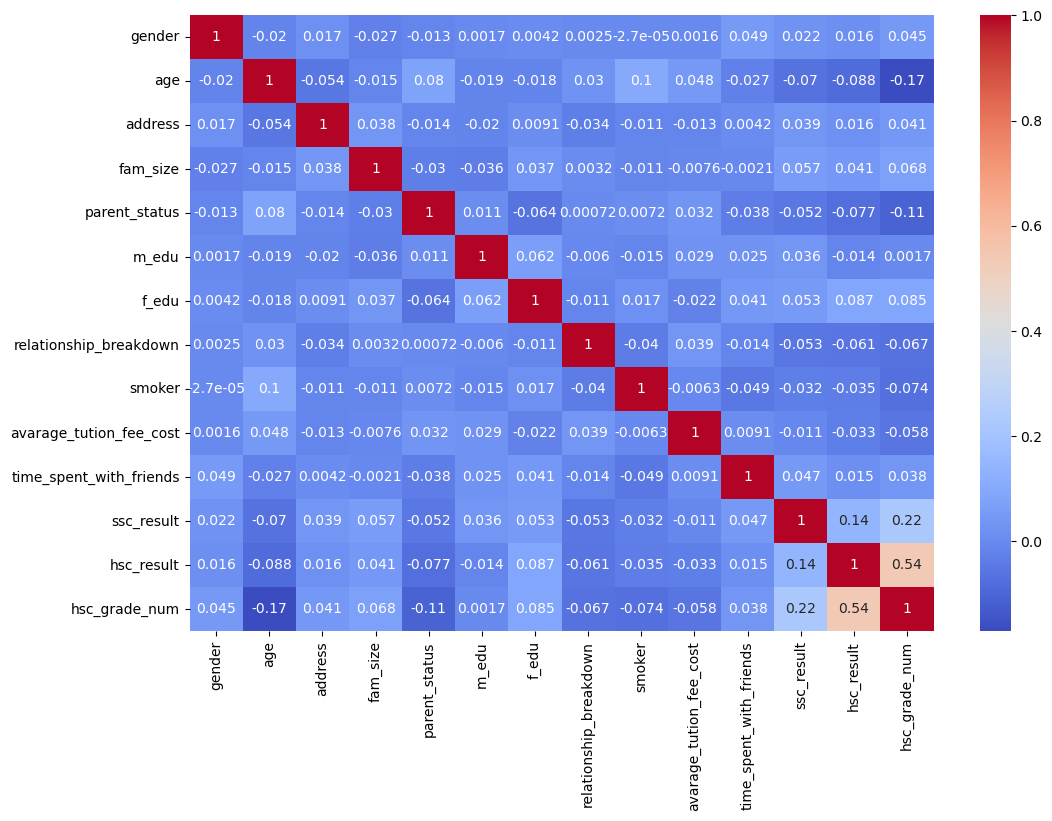

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [17]:
df = df.drop(['m_job', 'f_job', 'hsc_result', 'hsc_grade_num'], axis=1)

X = df.drop('hsc_grade', axis=1)
y = df['hsc_grade']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['avarage_tution_fee_cost', 'age']] = scaler.fit_transform(df[['avarage_tution_fee_cost', 'age']])

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.93      0.99      0.96       385
          A+       0.83      0.62      0.71        16
          A-       0.00      0.00      0.00        24

    accuracy                           0.92       425
   macro avg       0.59      0.54      0.56       425
weighted avg       0.87      0.92      0.90       425

[[383   2   0]
 [  6  10   0]
 [ 24   0   0]]


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=500, multi_class="auto", random_state=42))
    ]),
    "SVM_RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, random_state=42))
    ]),
    "SVM_Linear": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="linear", probability=True, random_state=42))
    ]),
    "KNN_45": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=45))
    ]),
    "SGD_Logistic": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42))
    ]),
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n {name} Results: ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


 LogisticRegression Results: 
Accuracy: 0.9271
              precision    recall  f1-score   support

           A       0.93      0.99      0.96       385
          A+       0.85      0.69      0.76        16
          A-       0.00      0.00      0.00        24

    accuracy                           0.93       425
   macro avg       0.59      0.56      0.57       425
weighted avg       0.87      0.93      0.90       425

[[383   2   0]
 [  5  11   0]
 [ 24   0   0]]

 SVM_RBF Results: 
Accuracy: 0.9247
              precision    recall  f1-score   support

           A       0.92      1.00      0.96       385
          A+       1.00      0.50      0.67        16
          A-       0.00      0.00      0.00        24

    accuracy                           0.92       425
   macro avg       0.64      0.50      0.54       425
weighted avg       0.87      0.92      0.89       425

[[385   0   0]
 [  8   8   0]
 [ 24   0   0]]

 SVM_Linear Results: 
Accuracy: 0.9271
              precisi

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [22]:
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

train_df = X_train.copy()
train_df['hsc_grade'] = y_train.values

df_A  = train_df[train_df['hsc_grade'] == 'A']
df_AP = train_df[train_df['hsc_grade'] == 'A+']
df_AM = train_df[train_df['hsc_grade'] == 'A-']
df_others = train_df[~train_df['hsc_grade'].isin(['A', 'A+', 'A-'])]

n_target = len(df_A)

if n_target == 0:
    print("No 'A' in training set; skipping manual upsampling.")
    X_train_res, y_train_res = X_train, y_train.copy()
else:
    # Upsampling class A+ and A- to match count of A
    df_AP_up = resample(df_AP, replace=True, n_samples=n_target, random_state=42) if len(df_AP) else df_AP
    df_AM_up = resample(df_AM, replace=True, n_samples=n_target, random_state=42) if len(df_AM) else df_AM

    train_up = pd.concat([df_A, df_AP_up, df_AM_up, df_others], axis=0)\
                 .sample(frac=1, random_state=42).reset_index(drop=True)

    X_train_res = train_up.drop(columns=['hsc_grade'])
    y_train_res = train_up['hsc_grade']

print("Train class distribution before:", y_train.value_counts().to_dict())
print("Train class distribution after :", y_train_res.value_counts().to_dict())

# Train models on upsampled train; evaluate on untouched test set
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_res, y_train_res)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Results:")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

le = LabelEncoder()
y_train_res_enc = le.fit_transform(y_train_res)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_res, y_train_res_enc)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb_labels))
print(confusion_matrix(y_test, y_pred_xgb_labels))

Train class distribution before: {'A': 1538, 'A-': 95, 'A+': 62, 'B': 2}
Train class distribution after : {'A+': 1538, 'A': 1538, 'A-': 1538, 'B': 2}

Random Forest Results:
              precision    recall  f1-score   support

           A       0.93      0.99      0.96       385
          A+       0.92      0.75      0.83        16
          A-       0.33      0.04      0.07        24

    accuracy                           0.93       425
   macro avg       0.73      0.59      0.62       425
weighted avg       0.90      0.93      0.91       425

[[382   1   2]
 [  4  12   0]
 [ 23   0   1]]

AdaBoost Results:
              precision    recall  f1-score   support

           A       0.93      1.00      0.96       385
          A+       0.93      0.81      0.87        16
          A-       0.00      0.00      0.00        24

    accuracy                           0.93       425
   macro avg       0.62      0.60      0.61       425
weighted avg       0.88      0.93      0.91       425


In [36]:
random_idx = np.random.choice(X_test.index)
sample_X = X_test.loc[random_idx]
sample_y_true = y_test.loc[random_idx]

sample_X_reshaped = sample_X.values.reshape(1, -1)

rf_pred = rf.predict(sample_X_reshaped)[0]
ada_pred = ada.predict(sample_X_reshaped)[0]
xgb_pred = le.inverse_transform(xgb.predict(sample_X_reshaped))[0]

print("Selected student's features and values:")
print(sample_X)
print(f"\nTrue label: {sample_y_true}")
print(f"Random Forest prediction: {rf_pred}")
print(f"AdaBoost prediction: {ada_pred}")
print(f"XGBoost prediction: {xgb_pred}")

Selected student's features and values:
gender                          0.00
age                            22.00
address                         0.00
fam_size                        1.00
parent_status                   1.00
m_edu                           2.00
f_edu                           3.00
relationship_breakdown          0.00
smoker                          1.00
avarage_tution_fee_cost    450000.00
time_spent_with_friends         1.00
ssc_result                      4.13
Name: 955, dtype: float64

True label: A
Random Forest prediction: A
AdaBoost prediction: A
XGBoost prediction: A


In [24]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Compute train class counts
train_counts = y_train.value_counts()
target_A = int(train_counts.get('A', 0))

# Decide which classes to SMOTE (need >=2 samples) and which to ROS (<2 samples)
desired_smote = {}
ros_needed = {}
for label in ['A+', 'A-']:
    cnt = int(train_counts.get(label, 0))
    if target_A > cnt and cnt >= 2:
        desired_smote[label] = target_A 
    elif target_A > cnt and cnt > 0:
        ros_needed[label] = target_A

if desired_smote:
    min_targeted = min(train_counts[l] for l in desired_smote.keys())
    safe_k = max(1, min(5, int(min_targeted) - 1))
    smote = SMOTE(random_state=42, sampling_strategy=desired_smote, k_neighbors=safe_k)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
else:
    X_train_bal, y_train_bal = X_train.copy(), y_train.copy()

if ros_needed:
    ros = RandomOverSampler(random_state=42, sampling_strategy=ros_needed)
    X_train_bal, y_train_bal = ros.fit_resample(X_train_bal, y_train_bal)

print("Train class counts before:", train_counts.to_dict())
print("Train class counts after :", pd.Series(y_train_bal).value_counts().to_dict())

# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_bal, y_train_bal)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Results:")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

# XGBoost
le = LabelEncoder()
y_train_bal_enc = le.fit_transform(y_train_bal)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_bal, y_train_bal_enc)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb_labels))
print(confusion_matrix(y_test, y_pred_xgb_labels))

Train class counts before: {'A': 1538, 'A-': 95, 'A+': 62, 'B': 2}
Train class counts after : {'A': 1538, 'A-': 1538, 'A+': 1538, 'B': 2}

Random Forest Results:
              precision    recall  f1-score   support

           A       0.93      0.91      0.92       385
          A+       0.67      0.75      0.71        16
          A-       0.00      0.00      0.00        24

    accuracy                           0.86       425
   macro avg       0.53      0.55      0.54       425
weighted avg       0.86      0.86      0.86       425

[[352   6  27]
 [  4  12   0]
 [ 24   0   0]]

AdaBoost Results:
              precision    recall  f1-score   support

           A       0.93      0.96      0.95       385
          A+       0.48      0.88      0.62        16
          A-       0.00      0.00      0.00        24
           B       0.00      0.00      0.00         0

    accuracy                           0.90       425
   macro avg       0.35      0.46      0.39       425
weighted avg

Random Forest Feature Importances (SMOTE):
ssc_result                 0.288682
age                        0.191710
avarage_tution_fee_cost    0.126934
time_spent_with_friends    0.098127
f_edu                      0.056674
relationship_breakdown     0.041716
smoker                     0.038079
fam_size                   0.033746
parent_status              0.033114
gender                     0.032513
m_edu                      0.030064
address                    0.028641
dtype: float64


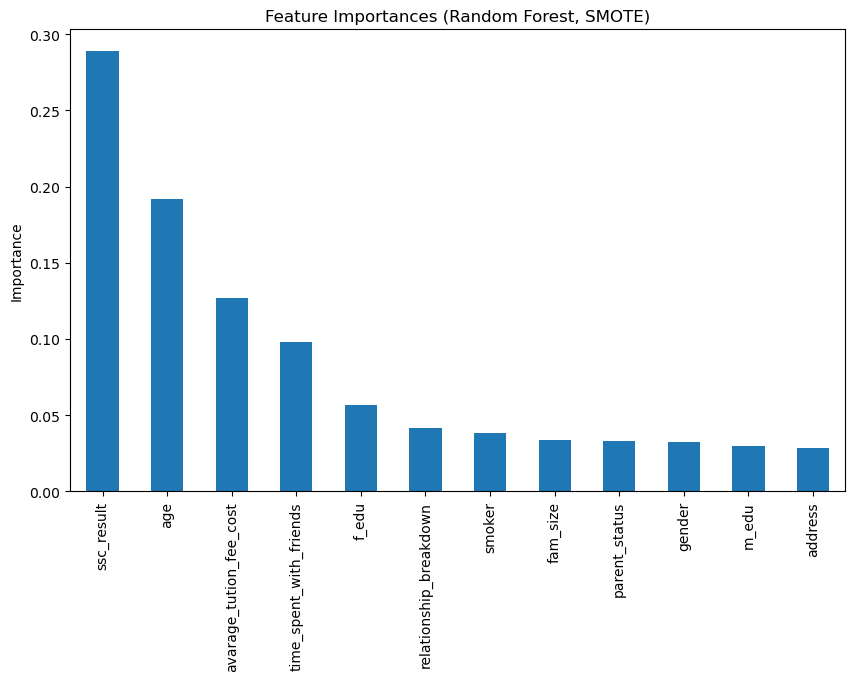

In [25]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Random Forest Feature Importances (SMOTE):")
print(feature_importances)

# Optional: Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest, SMOTE)')
plt.ylabel('Importance')
plt.show()

In [26]:
# from sklearn.utils import resample

# df_A = df[df['hsc_grade'] == 'A']
# df_AP = df[df['hsc_grade'] == 'A+']
# df_AM = df[df['hsc_grade'] == 'A-']

# df_AP_upsampled = resample(df_AP, replace=True, n_samples=len(df_A), random_state=42)
# df_AM_upsampled = resample(df_AM, replace=True, n_samples=len(df_A), random_state=42)

# df_upsampled = pd.concat([df_A, df_AP_upsampled, df_AM_upsampled])
# df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# X = df_upsampled.drop(['hsc_grade', 'm_job', 'f_job', 'hsc_result', 'hsc_grade_num', 'fam_size', 'address', 'relationship_breakdown', 'parent_status'], axis=1, errors='ignore')
# y = df_upsampled['hsc_grade']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test, y_train_enc, y_test_enc = train_test_split(
#     X, y, y_encoded, test_size=0.2, random_state=42, stratify=y
# )

# # Random Forest
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print("Random Forest Results:")
# print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf))

# # AdaBoost
# from sklearn.ensemble import AdaBoostClassifier
# ada = AdaBoostClassifier(random_state=42)
# ada.fit(X_train, y_train)
# y_pred_ada = ada.predict(X_test)
# print("AdaBoost Results:")
# print(classification_report(y_test, y_pred_ada))
# print(confusion_matrix(y_test, y_pred_ada))

# # XGBoost
# from xgboost import XGBClassifier
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
# xgb.fit(X_train, y_train_enc)
# y_pred_xgb = xgb.predict(X_test)
# y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)
# print("XGBoost Results:")
# print(classification_report(y_test, y_pred_xgb_labels))
# print(confusion_matrix(y_test, y_pred_xgb_labels))

In [27]:
# feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
# feature_importances = feature_importances.sort_values(ascending=False)

# print("Random Forest Feature Importances (SMOTE):")
# print(feature_importances)

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))
# feature_importances.plot(kind='bar')
# plt.title('Feature Importances (Random Forest, SMOTE)')
# plt.ylabel('Importance')
# plt.show()

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Prepare to store results
fold_accuracies = []
fold_reports = []

# Perform Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train Random Forest model
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    
    # Predict and evaluate
    y_pred_fold = rf.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(accuracy)
    fold_reports.append(classification_report(y_test_fold, y_pred_fold))
    
    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_test_fold, y_pred_fold))
    print(classification_report(y_test_fold, y_pred_fold))

# Print overall results
print("\nOverall Cross-Validation Accuracy:", sum(fold_accuracies) / len(fold_accuracies))

Fold 1 Accuracy: 0.9249
[[192   1   0   0]
 [  3   5   0   0]
 [ 11   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           A       0.93      0.99      0.96       193
          A+       0.83      0.62      0.71         8
          A-       0.00      0.00      0.00        11
           B       0.00      0.00      0.00         1

    accuracy                           0.92       213
   macro avg       0.44      0.40      0.42       213
weighted avg       0.87      0.92      0.90       213

Fold 2 Accuracy: 0.9343
[[193   0   0   0]
 [  1   6   0   0]
 [ 12   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           A       0.93      1.00      0.96       193
          A+       1.00      0.86      0.92         7
          A-       0.00      0.00      0.00        12
           B       0.00      0.00      0.00         1

    accuracy                           0.93       213
   macro avg       0.48      0.46    

In [29]:
print(y_train.value_counts())

hsc_grade
A     1538
A-      95
A+      62
B        2
Name: count, dtype: int64


In [30]:
# ...existing code...
from collections import Counter
import numpy as np

# After an RF fit producing y_pred on X_test
print("Predicted counts:", Counter(y_pred))
print("A- support in test:", int((y_test=='A-').sum()))
print("A- predicted:", int((pd.Series(y_pred)=='A-').sum()))

# If model has predict_proba:
if hasattr(rf, "predict_proba"):
    proba = rf.predict_proba(X_test)
    classes = rf.classes_
    cls_to_idx = {c:i for i,c in enumerate(classes)}
    if 'A-' in cls_to_idx:
        a_minus_idx = cls_to_idx['A-']
        top2 = np.argsort(proba, axis=1)[:, -2:]
        top1_lbl = classes[top2[:, -1]]
        top2_lbl = classes[top2[:, -2]]
        a_minus_second = ((top1_lbl!='A-') & (top2_lbl=='A-')).sum()
        print("A- as 2nd choice:", int(a_minus_second))

Predicted counts: Counter({'A': 407, 'A+': 16, 'B': 2})
A- support in test: 24
A- predicted: 0
A- as 2nd choice: 302


In [31]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Columns to preprocess (numeric in your X_train)
num_cols = X_train.select_dtypes(include='number').columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), num_cols)
    ],
    remainder='drop'  # change to 'passthrough' if you still have non-numeric features to keep
)

# Start from balanced class weights and boost A- (and tiny classes) more
classes = np.array(sorted(y_train.unique()))
base_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, base_weights))
class_weights['A-'] = class_weights.get('A-', 1.0) * 4.0   # tune this factor
class_weights['A+'] = class_weights.get('A+', 1.0) * 2.0   # optional boost
for c in ['B', 'C', 'D', 'F']:                              # if present, boost tiny classes
    if c in class_weights:
        class_weights[c] *= 4.0

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=600,
        min_samples_leaf=4,
        class_weight=class_weights,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.94      0.98      0.96       385
          A+       0.78      0.88      0.82        16
          A-       0.33      0.04      0.07        24

    accuracy                           0.93       425
   macro avg       0.68      0.63      0.62       425
weighted avg       0.90      0.93      0.91       425

[[379   4   2]
 [  2  14   0]
 [ 23   0   1]]


In [32]:
from collections import Counter

print("Predicted counts:", Counter(y_pred))
if hasattr(rf_pipeline.named_steps['clf'], "predict_proba"):
    proba = rf_pipeline.predict_proba(X_test)
    cls = rf_pipeline.named_steps['clf'].classes_
    idx = {c:i for i,c in enumerate(cls)}
    if 'A-' in idx:
        top2 = np.argsort(proba, axis=1)[:, -2:]
        top1_lbl = cls[top2[:, -1]]
        top2_lbl = cls[top2[:, -2]]
        print("A- support in test:", int((y_test=='A-').sum()))
        print("A- predicted:", int((pd.Series(y_pred)=='A-').sum()))
        print("A- as 2nd choice:", int(((top1_lbl!='A-') & (top2_lbl=='A-')).sum()))

Predicted counts: Counter({'A': 404, 'A+': 18, 'A-': 3})
A- support in test: 24
A- predicted: 3
A- as 2nd choice: 386


In [33]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from collections import Counter

# Get calibrated probabilities
proba = rf_pipeline.predict_proba(X_test)
classes = rf_pipeline.named_steps['clf'].classes_

# Set per-class multipliers (tune these)
mult = {c: 1.0 for c in classes}
mult['A-'] = 3.0      # try 2–6
mult['A+'] = 1.5      # optional

# Build multiplier vector aligned to classes
mvec = np.array([mult[c] for c in classes], dtype=float)

# Weighted argmax
y_pred_w = classes[np.argmax(proba * mvec, axis=1)]

print("Weighted decision results")
print("Predicted counts:", Counter(y_pred_w))
print(classification_report(y_test, y_pred_w))
print(confusion_matrix(y_test, y_pred_w))

Weighted decision results
Predicted counts: Counter({'A': 281, 'A-': 126, 'A+': 18})
              precision    recall  f1-score   support

           A       0.95      0.69      0.80       385
          A+       0.78      0.88      0.82        16
          A-       0.08      0.42      0.13        24

    accuracy                           0.68       425
   macro avg       0.60      0.66      0.59       425
weighted avg       0.89      0.68      0.76       425

[[266   4 115]
 [  1  14   1]
 [ 14   0  10]]


In [34]:
best_m, best_f1 = 1.0, -1
for a_minus_w in [1.0,1.5,2,2.5,3,4,5,6,8]:
    mvec = np.array([a_minus_w if c=='A-' else 1.0 for c in classes])
    preds = classes[np.argmax(proba * mvec, axis=1)]
    score = f1_score(y_test, preds, average='macro')
    if score > best_f1:
        best_f1, best_m = score, a_minus_w

print(f"Best A- weight: {best_m}  macro-F1: {best_f1:.4f}")
y_pred_best = classes[np.argmax(proba * np.array([best_m if c=='A-' else 1.0 for c in classes]), axis=1)]
print(classification_report(y_test, y_pred_best))

Best A- weight: 1.0  macro-F1: 0.6194
              precision    recall  f1-score   support

           A       0.94      0.98      0.96       385
          A+       0.78      0.88      0.82        16
          A-       0.33      0.04      0.07        24

    accuracy                           0.93       425
   macro avg       0.68      0.63      0.62       425
weighted avg       0.90      0.93      0.91       425



In [35]:
gap = 0.04  # tune 0.02–0.10
top2_idx = np.argsort(proba, axis=1)[:, -2:]
top1 = top2_idx[:, 1]
top2 = top2_idx[:, 0]

y_pred_close = classes[top1].copy()
a_idx = np.where(classes=='A')[0][0] if 'A' in classes else None
ap_idx = np.where(classes=='A+')[0][0] if 'A+' in classes else None
am_idx = np.where(classes=='A-')[0][0] if 'A-' in classes else None

mask_close = (
    (top1 != am_idx) &
    (np.isin(top1, [a_idx, ap_idx])) &
    (top2 == am_idx) &
    ((proba[np.arange(len(proba)), am_idx] >= proba[np.arange(len(proba)), top1] - gap))
)
y_pred_close[mask_close] = 'A-'

print("Close-gap decision results")
from collections import Counter
print("Predicted counts:", Counter(y_pred_close))
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_close))
print(confusion_matrix(y_test, y_pred_close))

Close-gap decision results
Predicted counts: Counter({'A': 402, 'A+': 18, 'A-': 5})
              precision    recall  f1-score   support

           A       0.94      0.98      0.96       385
          A+       0.78      0.88      0.82        16
          A-       0.20      0.04      0.07        24

    accuracy                           0.92       425
   macro avg       0.64      0.63      0.62       425
weighted avg       0.89      0.92      0.90       425

[[377   4   4]
 [  2  14   0]
 [ 23   0   1]]
